# Elecciones España 2016: ¿Cuántos votos obtuvo cada partido? 

En esta sección del trabajo analizamos los datos de las elecciones de 2016 para conocer los votos que obtuvo cada partido a nivel congreso.


El Ministerio del Interior español nos proporciona una serie de datos para poder realizar este análisis.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(style="whitegrid")

In [3]:
votos = pd.read_csv('08021606.csv', index_col=False )
votos.head()

,codigo_elecciones
0,022016061011190000490000076700000
1,022016061011490000280000033000000
2,022016061011490000940000070800000
3,022016061011890000810000076300000
4,022016061019990000680142625800023


## Formato Ministerio del Interior

Se realizó la siguiente función para obtener los datos del CSV y crear el formato marcado por el Ministerio del Interior. 

In [26]:
def get_cosas (x):
    foo = x['codigo_elecciones']
    tipo_eleccion = []
    ano_eleccion = []
    mes_eleccion = []
    num_vuelta = []
    codigo_comunidad = []
    codigo_ine = []
    codigo_distrito = []
    codigo_candidatura = []
    votos_obtenidos = []
    num_candidatos = []
    for i in range(len(foo)):
        tipo_eleccion.append(foo[i][:2])
        ano_eleccion.append(foo[i][2:6])
        mes_eleccion.append(foo[i][6:8])
        num_vuelta.append(foo[i][8:9])
        codigo_comunidad.append(foo[i][9:11])
        codigo_ine.append(foo[i][11:13])
        codigo_distrito.append(foo[i][13:14])
        codigo_candidatura.append(int(foo[i][14:20]))
        votos_obtenidos.append(int(foo[i][20:28]))
        num_candidatos.append(int(foo[i][28:33]))
    d = {'tipo_eleccion':tipo_eleccion,'ano_eleccion':ano_eleccion,'mes_eleccion':mes_eleccion,'num_vuelta':num_vuelta,
         'codigo_comunidad':codigo_comunidad,'codigo_ine':codigo_ine,'codigo_distrito':codigo_distrito, 
         'codigo_candidatura':codigo_candidatura, 'votos_obtenidos':votos_obtenidos,'num_candidatos': num_candidatos}
    datos_elecciones_2016 = pd.DataFrame(d)
    return datos_elecciones_2016

my_data = get_cosas(votos)
my_data = my_data.drop(columns = ['tipo_eleccion','ano_eleccion','mes_eleccion','num_vuelta',
                                 'codigo_distrito'])
my_data

,codigo_comunidad,codigo_ine,codigo_candidatura,votos_obtenidos,num_candidatos
0,01,11,49,767,0
1,01,14,28,330,0
2,01,14,94,708,0
3,01,18,81,763,0
4,01,99,68,1426258,23
...,...,...,...,...,...
822,16,99,81,312,0
823,17,03,93,1961,0
824,17,12,94,711,0
825,17,46,83,570,0


El código **99** representa los datos nacionales, decidimos basar nuestro análisis en este código y filtrarlo de esta forma.

In [27]:
my_data = my_data[(my_data['codigo_comunidad'] != '99')& (my_data['codigo_ine'] != '99')] 

Para tener una mejor visualización de los datos se agrego la sigla y denominación de los partidos de acuerdo al código de la candidatura. 

In [31]:
codigo_candidatura = pd.read_csv('03021606.csv', index_col=False, encoding='UTF-8', 
                                 sep = ";", names = ['tipo_eleccion','ano','mes'
                                                     ,'codigo_candidatura','siglas',
                                                     'denominación'
                                                     ,'codigo_nacional','sigla_nacional'], header=0)
codigo_candidatura = codigo_candidatura.drop(columns = ['tipo_eleccion','ano','mes','codigo_nacional'])
codigo_candidatura

,codigo_candidatura,siglas,denominación,sigla_nacional
0,94,VOX,VOX,VOX
1,93,UPyD,UNIÓN PROGRESO Y DEMOCRACIA,UPyD
2,91,UPL,UNIÓN DEL PUEBLO LEONÉS,UPL
3,88,UNIDAD DEL PUEBLO,UNIDAD DEL PUEBLO,UNIDAD DEL PUEBLO
4,87,UDT,UNIÓN DE TODOS,UDT
...,...,...,...,...
76,8,CCD,CIUDADANOS DE CENTRO DEMOCRÁTICO,CCD
77,7,CCa-PNC,COALICIÓN CANARIA-PARTIDO NACIONALISTA CANARIO,CCa-PNC
78,5,BNG-NÓS,BNG-NÓS CANDIDATURA GALEGA,BNG-NÓS
79,2,AND,PARTIDO SOMOS ANDALUCES POR ANDALUCÍA Y LOS PU...,AND


A continuación, realizamos la unión de todos los datos en una sola tabla.

In [32]:
merge_candidatura = my_data.merge(codigo_candidatura,on= 'codigo_candidatura')
merge_candidatura

,codigo_comunidad,codigo_ine,codigo_candidatura,votos_obtenidos,num_candidatos,siglas,denominación,sigla_nacional
0,01,11,49,767,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,PCPE
1,06,39,49,468,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,PCPE
2,08,40,49,117,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,PCPE
3,01,18,49,641,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,PCPE
4,08,09,49,287,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,PCPE
...,...,...,...,...,...,...,...,...
540,05,35,78,119351,2,PSOE-NCa,PARTIDO SOCIALISTA OBRERO ESPAÑOL-NUEVA CANARIAS,PSOE
541,13,31,63,94972,2,PODEMOS-IU-EQUO-BATZARRE,UNIDOS PODEMOS-ELKARREKIN AHAL DUGU,UNIDOS PODEMOS
542,02,22,24,377,0,ENTABAN,ENTABAN,ENTABAN
543,02,22,60,22430,1,PODEMOS-IU-,UNIDOS PODEMOS EN ALTO ARAGÓN,UNIDOS PODEMOS


## Añadiendo datos de población
Para poderle dar mayor sentido a los datos de votos vamos a obtener los datos de población del INE

In [38]:
poblacion_provincia = pd.read_csv('poblacion_por_provincia.csv', index_col=False , skiprows = 5, sep = ";",encoding='iso-8859-1')
poblacion_provincia.rename(columns={'Unnamed: 0':'provincia','2016':'num_poblacion'},inplace=True)
poblacion_provincia.drop(poblacion_provincia.tail(4).index,inplace=True)
poblacion_provincia.drop(poblacion_provincia.head(1).index, inplace=True)
poblacion_provincia = poblacion_provincia.reset_index().drop(columns = ['index'])
poblacion_provincia

def get_cosas (x):
    foo = x['provincia']
    foo2 = x['num_poblacion']
    codigo_ine = []
    nombre_provincia = []
    num_poblacion = []
    for i in range(len(foo)):
        codigo_ine.append(foo[i][:2])
        nombre_provincia.append(foo[i][3:])
        num_poblacion.append(int(foo2[i]))
    d = {'codigo_ine':codigo_ine,'nombre_provincia':nombre_provincia, 
         'num_poblacion':num_poblacion}
    datos_poblacion_2016 = pd.DataFrame(d)
    return datos_poblacion_2016

my_poblacion = get_cosas(poblacion_provincia)
my_poblacion

,codigo_ine,nombre_provincia,num_poblacion
0,02,Albacete,392118
1,03,Alicante/Alacant,1836459
2,04,Almería,704297
3,01,Araba/Álava,324126
4,33,Asturias,1042608
5,05,Ávila,162514
6,06,Badajoz,684113
7,07,"Balears, Illes",1107220
8,08,Barcelona,5542680
9,48,Bizkaia,1147576


Y se lo añadimos a traves de "codigo_ine"

In [39]:
merge_candidatura = merge_candidatura.merge(my_poblacion,on= 'codigo_ine')
merge_candidatura

,codigo_comunidad,codigo_ine,codigo_candidatura,votos_obtenidos,num_candidatos,siglas,denominación,sigla_nacional,nombre_provincia,num_poblacion
0,01,11,49,767,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,PCPE,Cádiz,1239889
1,01,11,28,472,0,FE de las J,FALANGE ESPAÑOLA DE LAS JONS,FE de las J,Cádiz,1239889
2,01,11,94,1253,0,VOX,VOX,VOX,Cádiz,1239889
3,01,11,81,1417,0,RECORTES CERO-GRUPO VERDE,RECORTES CERO-GRUPO VERDE,RECORTES CERO-GRUPO VERDE,Cádiz,1239889
4,01,11,53,393,0,P-LIB,PARTIDO LIBERTARIO,P-LIB,Cádiz,1239889
...,...,...,...,...,...,...,...,...,...,...
540,11,32,68,92539,3,PP,PARTIDO POPULAR,PP,Ourense,314853
541,11,32,42,1671,0,PACMA,PARTIDO ANIMALISTA CONTRA O MALTRATO ANIMAL,PACMA,Ourense,314853
542,11,32,56,29136,0,PODEMOS-EN MAREA-ANOVA-EU,EN MAREA,PODEMOS-EN MAREA-ANOVA-EU,Ourense,314853
543,11,32,75,43429,1,PSdeG-PSOE,PARTIDO DOS SOCIALISTAS DE GALICIA-PSOE,PSOE,Ourense,314853


## Código Nacional 

Agrupamos por código nacional

In [40]:
test = merge_candidatura.groupby(['sigla_nacional'], as_index = False).sum()
test

,sigla_nacional,codigo_candidatura,votos_obtenidos,num_candidatos,num_poblacion
0,'C''s',681,3141570,32,46557008
1,ALCD,2,214,0,997283
2,AND,4,1727,0,2420908
3,BNG-NÓS,20,45252,0,2718525
4,CCD,16,6273,0,3123509
5,CCD-CI,9,2672,0,523679
6,CCa-PNC,14,78253,1,2101924
7,CDC,40,483488,8,7522596
8,CENTRO MODERADO,11,3011,0,1836459
9,CILUS,12,830,0,648250


Ordenamos de mayor a menor de acuerdo a la cantidad de votos obtenidos. 

In [34]:
datos_order = test.sort_values(by=['votos_obtenidos'], ascending=False).reset_index()
datos_order

,index,sigla_nacional,codigo_candidatura,votos_obtenidos,num_candidatos
0,35,PP,3572,7941236,137
1,37,PSOE,3983,5443846,85
2,47,UNIDOS PODEMOS,2496,3227123,45
3,0,'C''s',681,3141570,32
4,12,ECP,88,853102,12
5,33,PODEMOS-COM,165,659771,9
6,15,ERC-CATSÍ,100,632234,9
7,7,CDC,40,483488,8
8,34,PODEMOS-EN MAREA-ANOVA-EU,224,347542,5
9,10,EAJ-PNV,48,287014,5


## TOP 5 partidos con el mayor número de votos

In [35]:
grafica_top = datos_order.sort_values(by=['votos_obtenidos'], ascending=False)
grafica_top = datos_order.head(5)
grafica_top

,index,sigla_nacional,codigo_candidatura,votos_obtenidos,num_candidatos
0,35,PP,3572,7941236,137
1,37,PSOE,3983,5443846,85
2,47,UNIDOS PODEMOS,2496,3227123,45
3,0,'C''s',681,3141570,32
4,12,ECP,88,853102,12


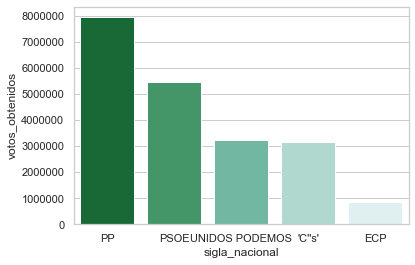

In [36]:
top = sns.barplot(x="sigla_nacional", y="votos_obtenidos", data=grafica_top,
             palette="BuGn_r")

De acuerdo al análisis realizado, observamos que el partido que más votos obtuvo en las elecciones de congreso en 2016 fue el partido **Partido Popular - PP** obteniendo un total de 7.941.236 millones de votos a nivel nacional. 

El segundo partido en obtener la mayor cantidad de votos fue **Partido Socialista Obrero Español - PSOE** con un total de **5.443.846** millones de votos a nivel nacional.

## Top 5 partidos con el menor número de votos

In [37]:
grafica_low = datos_order.tail(5)
grafica_low

,index,sigla_nacional,codigo_candidatura,votos_obtenidos,num_candidatos
46,16,FE,27,254,0
47,1,ALCD,2,214,0
48,18,FME,29,200,0
49,20,HRTS-Ln,31,80,0
50,45,UDT,87,48,0


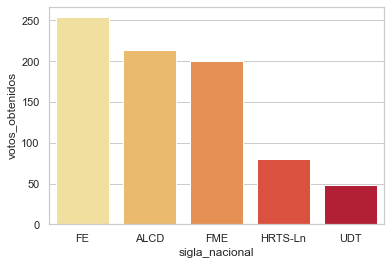

In [18]:
low = sns.barplot(x="sigla_nacional", y="votos_obtenidos", data=grafica_low,
             palette="YlOrRd")

Por otro lado podemos observar que el partido que obtuvo la menor cantidad de votos en las elecciones de 2016 a  fue **Unión de Todos** con un total de **48** votos.
